Found input device {'name': 'nanoSHARC micArray16 UAC2.0: USB Audio (hw:2,0)', 'index': 0, 'hostapi': 0, 'max_input_channels': 16, 'max_output_channels': 0, 'default_low_input_latency': 0.008684807256235827, 'default_low_output_latency': -1.0, 'default_high_input_latency': 0.034829931972789115, 'default_high_output_latency': -1.0, 'default_samplerate': 44100.0}
> 0 nanoSHARC micArray16 UAC2.0: USB Audio (hw:2,0), ALSA (16 in, 0 out)
  1 pulse, ALSA (32 in, 32 out)
< 2 default, ALSA (32 in, 32 out)
Found devices: in:0 out:2


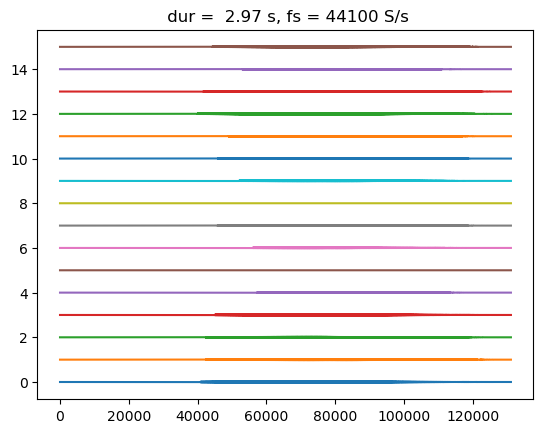


>>> Saving to file: pulse3k3d300+az45-el0.wav


In [29]:
import sounddevice as sd
import numpy as np
import scipy.io.wavfile as wv
import matplotlib.pyplot as plt
from signals import PulseWave
from filters import BandpassFilter, Normalize

# list_devices()
indev = sd.query_devices("micArray16")
print(f"Found input device {indev}")

# Constant parameters
PI = np.pi
speed_of_sound = 343.0
elem_distance = 0.042

# Audio parameters
Fs       = 44100
npt      = 128*1024 # per channel
dur      = npt/Fs
nchan    = 16
freq     = 3300
filename = 'pulse3k3d300+az45-el0.wav'

# Configure Audio devices
print(sd.query_devices())
dev_in = sd.query_devices("micArray16")
dev_out = sd.query_devices("default") # for Black USB-cable speaker
input_device_id = dev_in['index']
output_device_id = dev_out['index']
print(f"Found devices: in:{input_device_id} out:{output_device_id}")
sd.default.samplerate = Fs
sd.default.channels = nchan
sd.default.device = [input_device_id, output_device_id]

# Play & Record
outsmp = PulseWave(npt, Fs, freq, amp=0.2)

# play & record with 16 mics
signals = sd.playrec(outsmp, samplerate=Fs)
sd.wait()
# signals = Normalize(signals)

# Plot received audio
plt.close("all")
for ch in range(16):
    plt.plot(signals[:,ch]+ch, '-')
plt.title(" dur = %5.2f s, fs = %5.0f S/s"%(dur, Fs))
plt.show()

# Write wave file
print("\n>>> Saving to file: %s" % (filename))
wv.write(filename, Fs, signals)
